In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from termcolor import colored

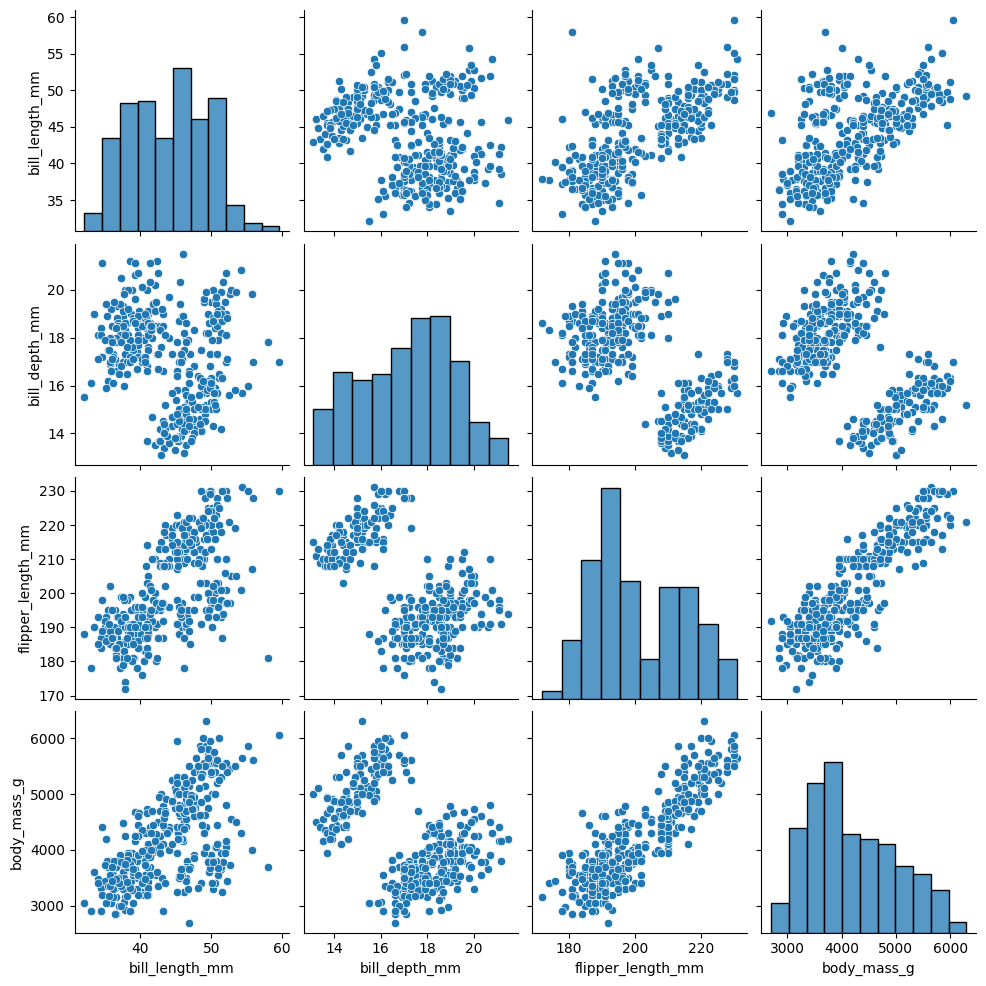

In [2]:

penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

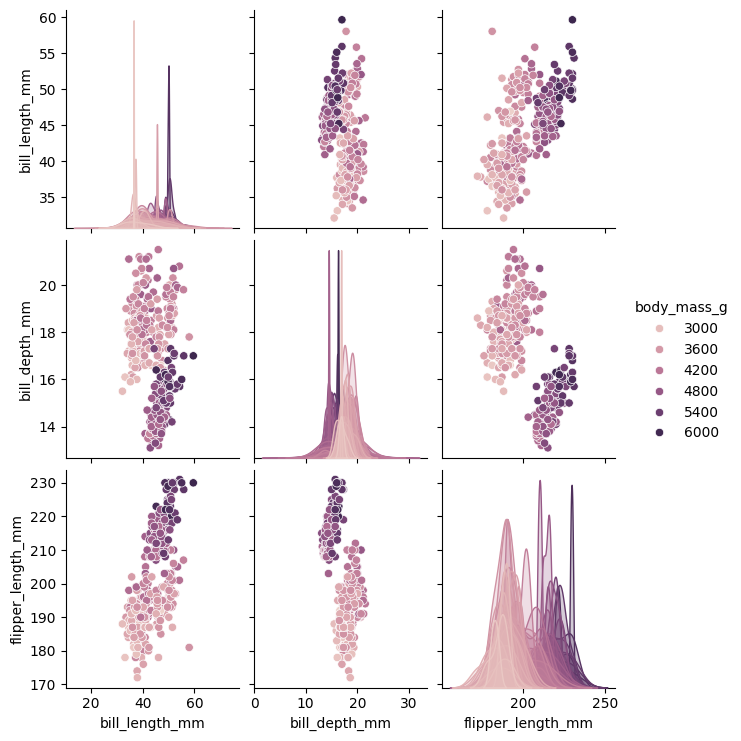

In [ ]:

sns.pairplot(
    data=penguins, 
    aspect=.85,
    hue='body_mass_g'); # hue='cat_col' подсвечивает указанную категорию другим цветом.

Тепловая карта

In [ ]:
# Функции:
sns.heatmap() # оси.
# Сначала запускаем df.corr(), чтобы получить таблицу коэффициентов корреляции:
penguins.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    penguins.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

ValueError: could not convert string to float: 'Adelie'

<Figure size 800x400 with 0 Axes>

Диаграмма рассеянея

In [ ]:
# Функции:
sns.scatterplot() # оси.
sns.relplot(kind='line')  # диаргамма.
# Функции с линией регрессии:
sns.regplot() # оси.
sns.lmplot() # диаргамма.

Text(0, 0.5, 'Fuel efficiency')

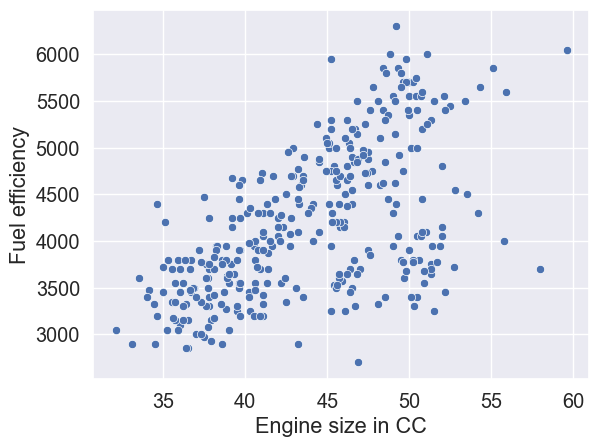

In [13]:

sns.scatterplot(
    x='bill_length_mm', 
    y='body_mass_g', 
    data=penguins)
plt.xlabel(
    'Engine size in CC')
plt.ylabel(
    'Fuel efficiency')

Функция regplot рисует диаграмму рассеяния с линией регрессии, показывающей тенденцию в данных.

Text(0, 0.5, 'Fuel efficiency')

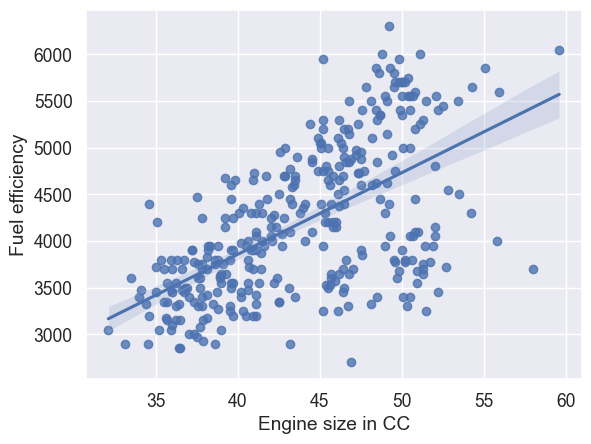

In [10]:
sns.regplot(
    x='bill_length_mm', 
    y='body_mass_g', 
    data=penguins)
plt.xlabel(
    'Engine size in CC')
plt.ylabel(
    'Fuel efficiency')

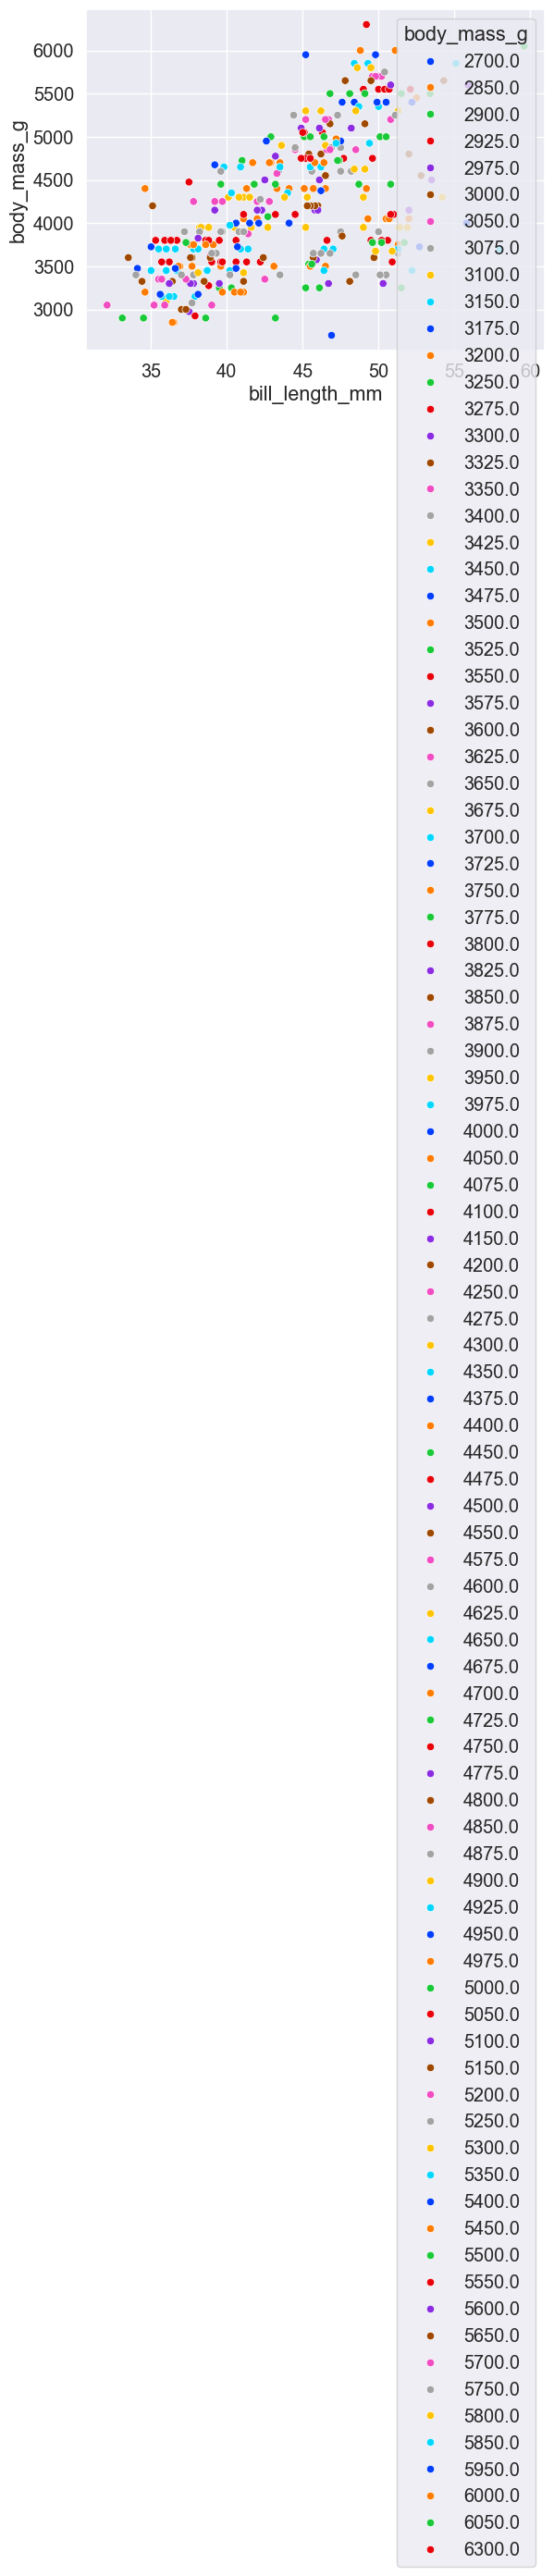

In [15]:
sns.scatterplot(
    x='bill_length_mm', 
    y='body_mass_g', 
    data=penguins,
    palette='bright',
    hue='body_mass_g'); # подсвечивает указанную категорию другим цветом

Диаграмма отношений relplot используется для создания диаграммы рассеяния с помощью kind='scatter' (установленного по умолчанию), или линейной диаграммы (kind='line'). Для разделения по цвету в kind='scatter' используется hue='cat_col

In [ ]:
sns.relplot(
   x='bill_length_mm', 
    y='body_mass_g', 
    data=penguins, 
    palette='bright',
    kind='scatter', 
    hue='fuel');

In [ ]:
sns.relplot(
    x='year', 
    y='selling_price', 
    data=cars, 
    kind='scatter', 
    col='transmission'); # данные разбиты на разные диаграммы по типу передачи автомобиля

In [22]:
penguins.dtypes[:].value_counts

<bound method IndexOpsMixin.value_counts of species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object>

In [38]:
def spearman(frame, target):
    features = frame.columns
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame[target], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    plt.show()
def basegrafsns(frame,features):
    subset = frame[features]
    sns.pairplot(subset)
    plt.show()
    sns.heatmap(subset.corr()
                ,cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1); 
    plt.show()
def pipelinesns(data,features,target = None):
    
    basegrafsns(data,features) 
    if(target == None):
            return
    spearman(data[features], target)
    
    

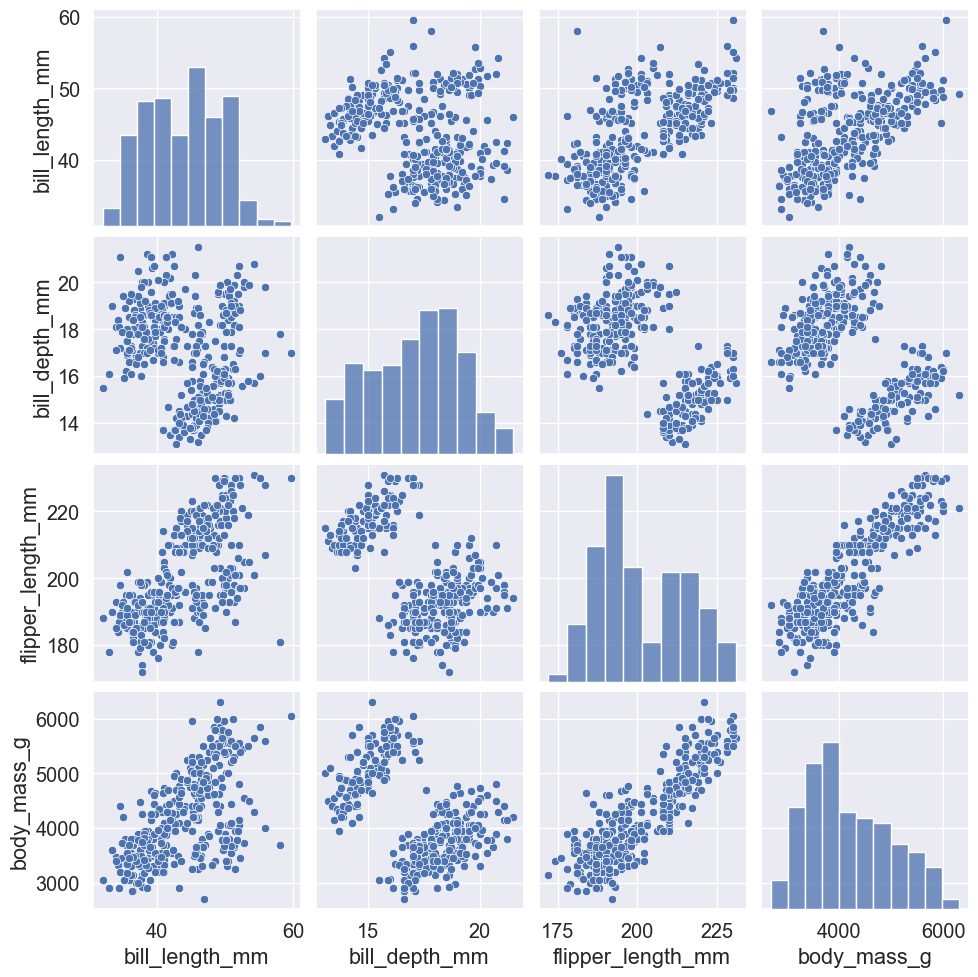

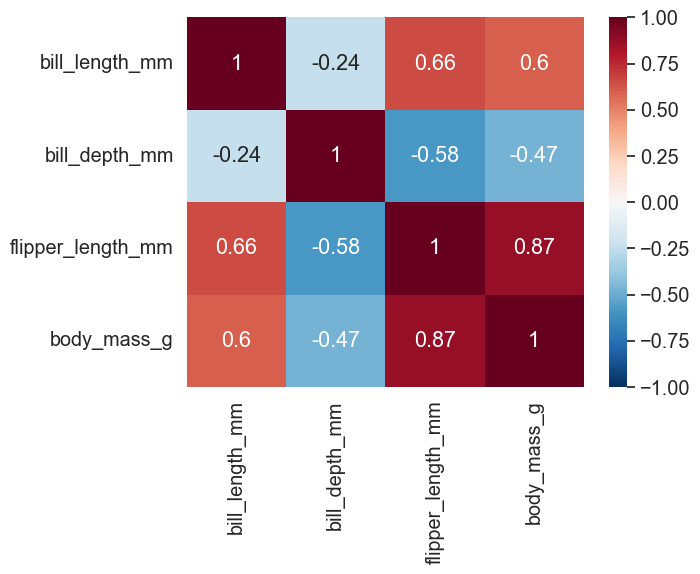

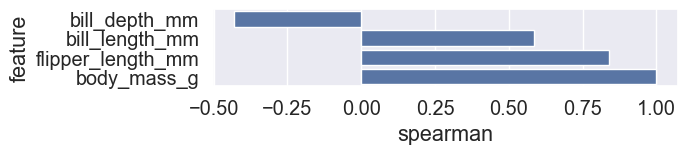

In [40]:
pipelinesns(penguins,target="body_mass_g")

In [56]:
tips = sns.load_dataset("tips")
cat =pd.Index(['day','sex'])

In [54]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

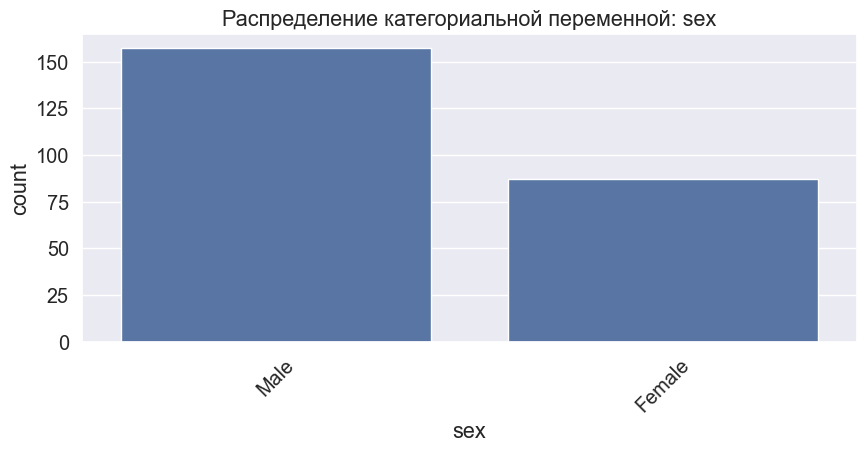

Статистика для sex и целевой переменной tip:
       sex      mean  median       var       std
0    Male  3.089618    3.00  2.217424  1.489102
1  Female  2.833448    2.75  1.344428  1.159495


C:\Users\JACK\AppData\Local\Temp\ipykernel_8988\447012024.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(feature)[target].agg(['mean', 'median', 'var', 'std']).reset_index()


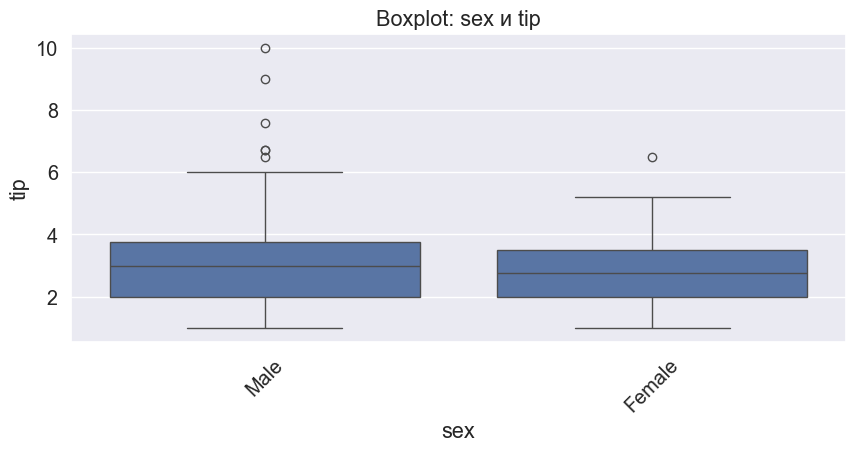

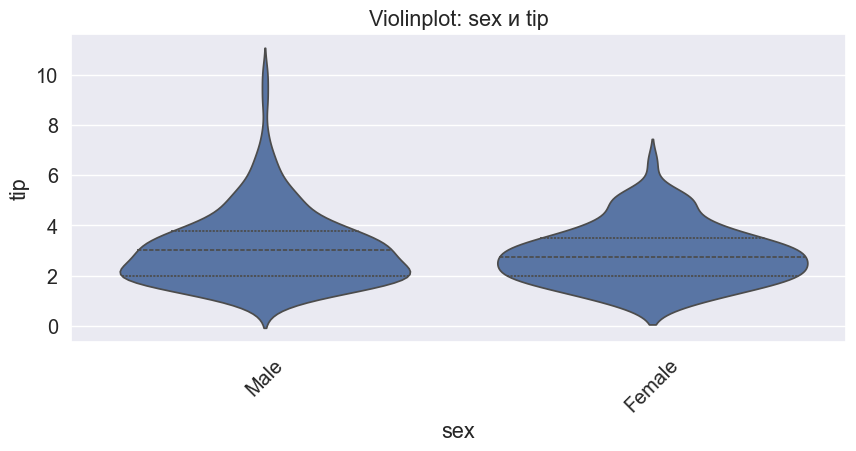

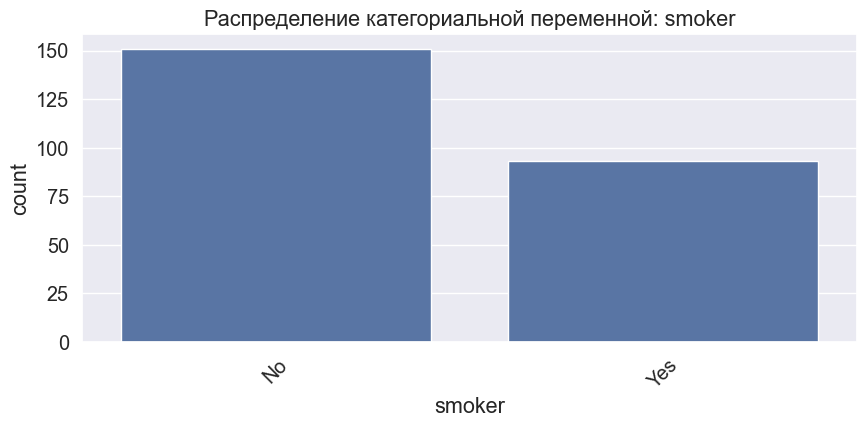

Статистика для smoker и целевой переменной tip:
   smoker      mean  median       var       std
0    Yes  3.008710    3.00  1.964111  1.401468
1     No  2.991854    2.74  1.896653  1.377190


C:\Users\JACK\AppData\Local\Temp\ipykernel_8988\447012024.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(feature)[target].agg(['mean', 'median', 'var', 'std']).reset_index()


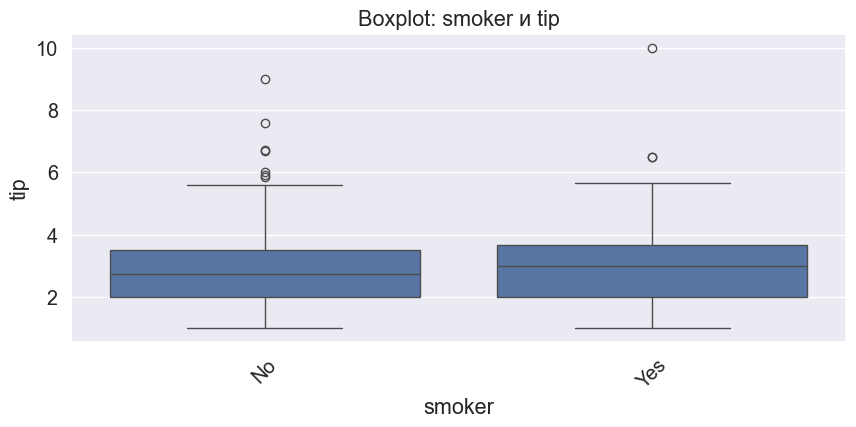

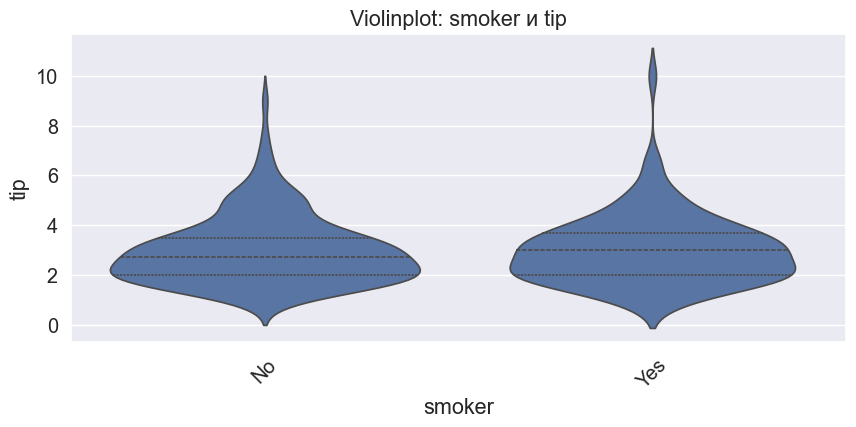

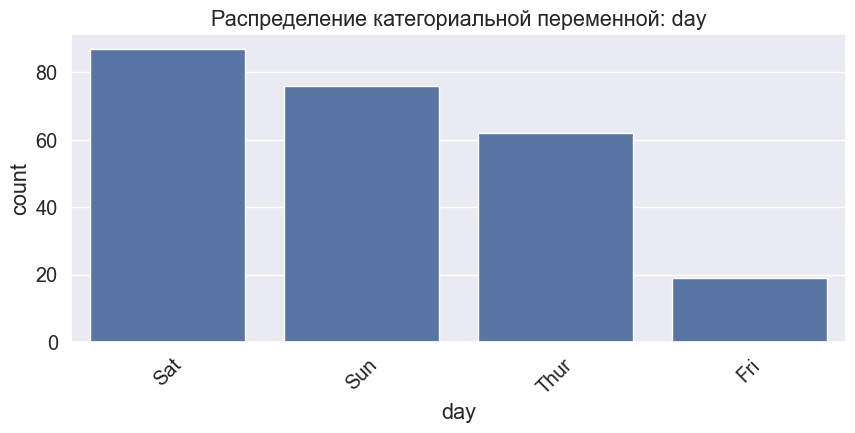

Статистика для day и целевой переменной tip:
     day      mean  median       var       std
0  Thur  2.771452   2.305  1.538154  1.240223
1   Fri  2.734737   3.000  1.039537  1.019577
2   Sat  2.993103   2.750  2.660208  1.631014
3   Sun  3.255132   3.150  1.524929  1.234880


C:\Users\JACK\AppData\Local\Temp\ipykernel_8988\447012024.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(feature)[target].agg(['mean', 'median', 'var', 'std']).reset_index()


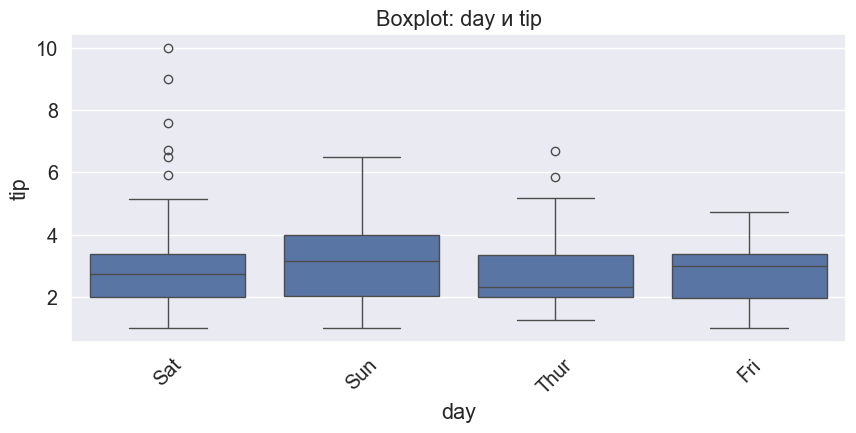

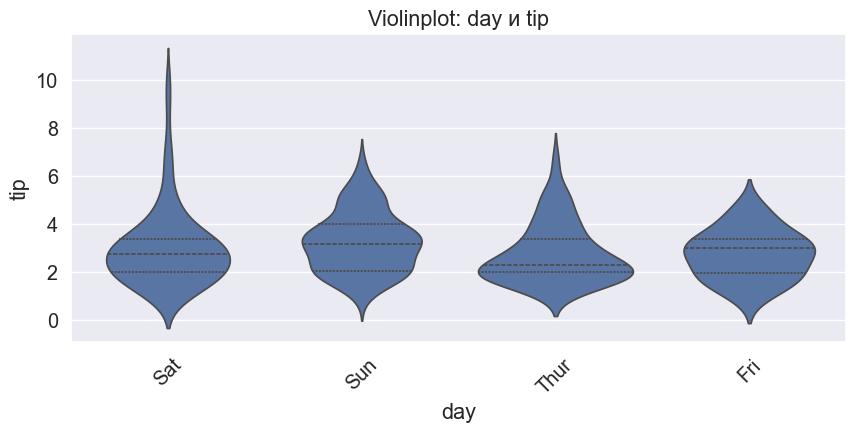

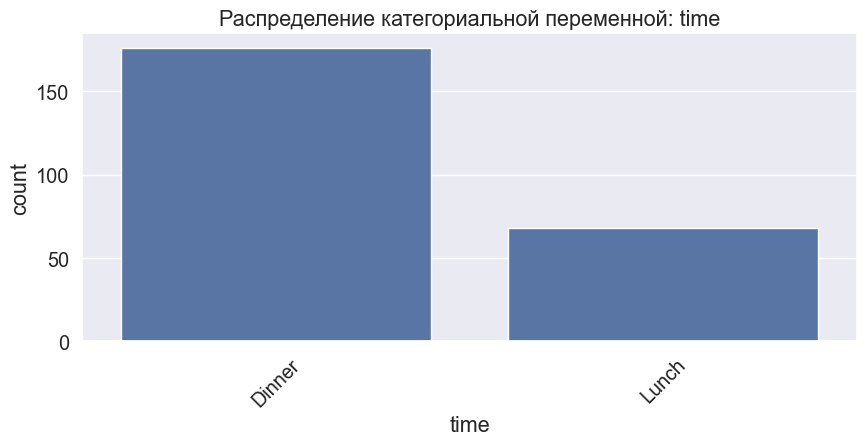

Статистика для time и целевой переменной tip:
      time      mean  median       var       std
0   Lunch  2.728088    2.25  1.452857  1.205345
1  Dinner  3.102670    3.00  2.062793  1.436243


C:\Users\JACK\AppData\Local\Temp\ipykernel_8988\447012024.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = data.groupby(feature)[target].agg(['mean', 'median', 'var', 'std']).reset_index()


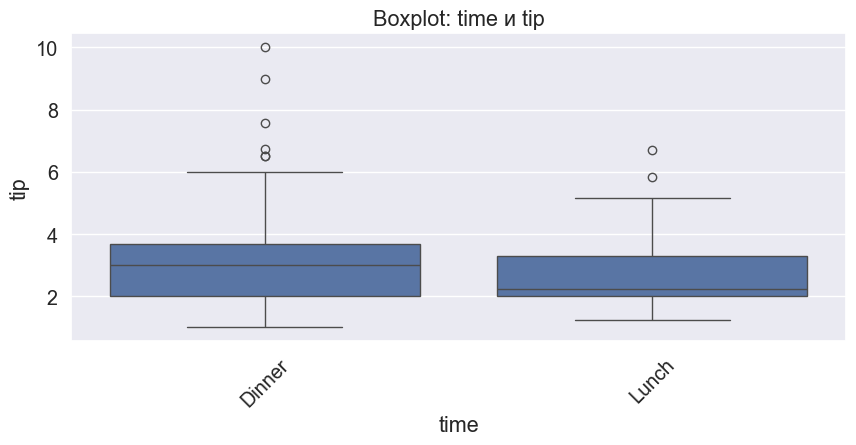

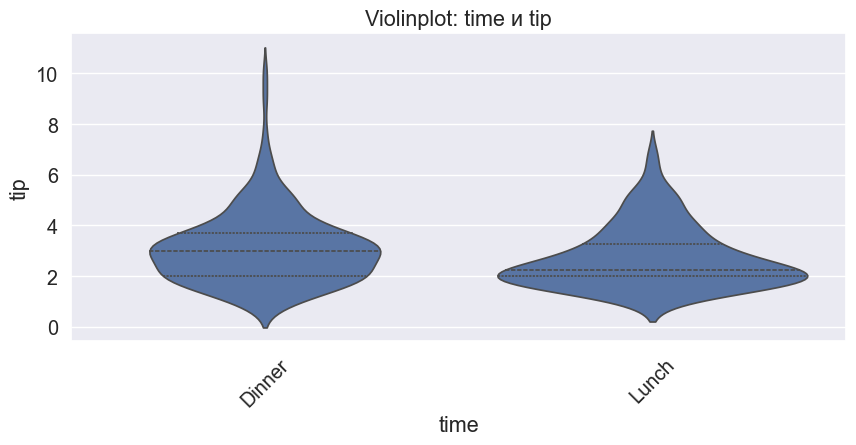

In [61]:
def analyze_categorical(data, categorical_features,target=None):
    # Выбираем только категориальные переменные
   
    
    for feature in categorical_features:
        # Визуализация распределения категориальной переменной
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
        plt.title(f"Распределение категориальной переменной: {feature}")
        plt.xticks(rotation=45)
        plt.show()
        
        # Если указана целевая переменная, анализируем взаимосвязь
        if target:
            if data[target].dtype != 'object' and data[target].dtype != 'category':
                # Вычисление статистики по категориям
                stats = data.groupby(feature)[target].agg(['mean', 'median', 'var', 'std']).reset_index()
                print(f"Статистика для {feature} и целевой переменной {target}:\n", stats)
                
                # Boxplot для отображения распределения
                plt.figure(figsize=(10, 4))
                sns.boxplot(data=data, x=feature, y=target, order=data[feature].value_counts().index)
                plt.title(f"Boxplot: {feature} и {target}")
                plt.xticks(rotation=45)
                plt.show()
                
                # Violinplot для более детального распределения
                #Лишнее
                # plt.figure(figsize=(10, 4))
                # sns.violinplot(data=data, x=feature, y=target, order=data[feature].value_counts().index, inner="quart")
                # plt.title(f"Violinplot: {feature} и {target}")
                # plt.xticks(rotation=45)
                # plt.show()
            else:
                # Если target категориальный, выполняем chi-square тест
                from scipy.stats import chi2_contingency
                contingency_table = pd.crosstab(data[feature], data[target])
                chi2, p, dof, ex = chi2_contingency(contingency_table)
                print(f"Chi-square тест для {feature} и {target}:")
                print(f"  Chi2 = {chi2:.4f}, p-value = {p:.4f}, dof = {dof}")



analyze_categorical(tips,'tip')